In [68]:
! pip install xgboost

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [106]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,1,67,0,3,0,37.205177,0,12.215677,7.780544,6.433890,...,1,0,6.009376,0,0,0,1,1,0,XXXConfid
1,2,65,1,0,0,35.141843,1,17.111404,6.645284,1.112379,...,0,0,7.519209,0,0,0,0,1,0,XXXConfid
2,3,62,0,1,1,17.875103,0,13.525546,9.585769,4.266008,...,0,0,8.573933,0,0,0,0,0,0,XXXConfid
3,4,67,0,0,1,37.503437,1,19.952014,1.953946,6.797333,...,0,0,6.217530,0,0,0,0,1,0,XXXConfid
4,5,65,1,0,2,29.187863,1,0.533209,8.759570,6.364302,...,1,0,5.193683,1,0,0,0,1,0,XXXConfid


In [107]:
df_train.drop(['DoctorInCharge'],axis = 1, inplace = True)

In [108]:
x_train = df_train.drop(['PatientID','Diagnosis'], axis = 1)
y_train = df_train['Diagnosis']

In [109]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,DoctorInCharge
0,1505,80,0,0,0,30.680705,0,13.278229,4.251053,5.654801,...,0.197431,0,0,4.469644,0,1,0,0,0,XXXConfid
1,1506,89,0,3,1,39.463034,0,9.811292,8.819950,0.434020,...,8.246968,0,0,2.018940,0,1,0,0,1,XXXConfid
2,1507,71,1,1,2,27.241423,0,0.244764,1.943318,4.353874,...,4.046998,0,0,9.940631,0,0,0,0,0,XXXConfid
3,1508,76,0,0,2,18.530132,0,9.621769,1.753789,6.938617,...,5.480984,0,0,3.219415,0,0,0,1,1,XXXConfid
4,1509,65,0,0,2,37.706252,1,5.207424,1.716515,3.480592,...,1.826698,1,0,0.069671,0,1,1,0,1,XXXConfid


In [110]:
x_test = df_test.drop(['PatientID','DoctorInCharge'], axis = 1)

In [111]:
params = {'objective':'binary:logistic','max_depth': 4,'alpha': 10,
        'learning_rate': 1.0,'n_estimators':100}

In [112]:
xgb_clf = XGBClassifier(**params)

In [113]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [114]:
val_scores = cross_val_score(xgb_clf, x_train, y_train, cv = 10)
print(f"Cross-validation scores_1 :{val_scores}")
print(f"Mean accuracy : {val_scores.mean():.2f}")

Cross-validation scores_1 :[0.98675497 0.93377483 0.90066225 0.94039735 0.96666667 0.95333333
 0.9        0.93333333 0.93333333 0.96      ]
Mean accuracy : 0.94


In [115]:
pred = xgb_clf.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

In [116]:
df_test['Diagnosis'] = pd.Series(pred)
df_test

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,DoctorInCharge,Diagnosis
0,1505,80,0,0,0,30.680705,0,13.278229,4.251053,5.654801,...,0,0,4.469644,0,1,0,0,0,XXXConfid,1
1,1506,89,0,3,1,39.463034,0,9.811292,8.819950,0.434020,...,0,0,2.018940,0,1,0,0,1,XXXConfid,0
2,1507,71,1,1,2,27.241423,0,0.244764,1.943318,4.353874,...,0,0,9.940631,0,0,0,0,0,XXXConfid,0
3,1508,76,0,0,2,18.530132,0,9.621769,1.753789,6.938617,...,0,0,3.219415,0,0,0,1,1,XXXConfid,0
4,1509,65,0,0,2,37.706252,1,5.207424,1.716515,3.480592,...,1,0,0.069671,0,1,1,0,1,XXXConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2145,66,1,1,1,36.221206,1,16.733257,2.221013,1.659351,...,0,1,7.989620,0,0,0,0,0,XXXConfid,1
641,2146,73,0,0,2,20.079092,0,4.304789,4.021262,3.446462,...,0,1,9.612101,0,0,0,0,0,XXXConfid,0
642,2147,68,1,0,1,25.355315,0,0.842862,5.769844,0.380685,...,0,0,6.004801,0,0,0,1,0,XXXConfid,0
643,2148,81,1,0,0,25.853357,0,3.809247,5.197996,9.809091,...,0,0,9.566590,0,1,0,0,0,XXXConfid,0


<Axes: title={'center': 'Feature Importances (Weight)'}, xlabel='F score', ylabel='Features'>

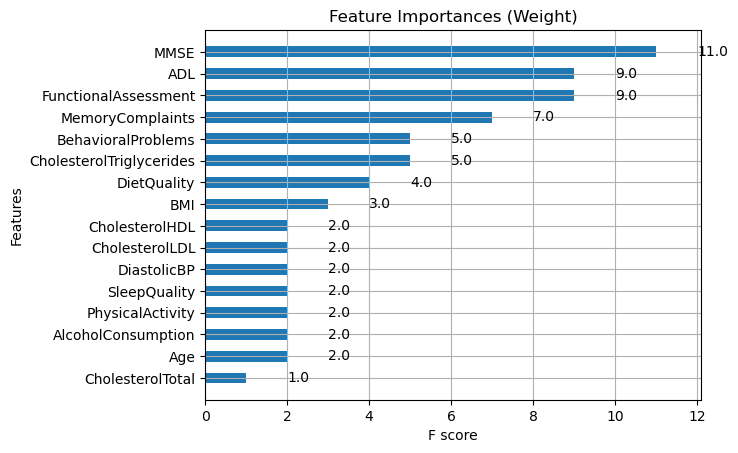

In [172]:
xgb.plot_importance(xgb_clf,max_num_features=20,title='Feature Importances (Weight)', height=0.5)